# Histogram Tracking

Kevin J. Walchko, created 5 Dec 2016

**Still a work in progress**

In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
import cv2
import time

In [3]:
print('OpenCV version {}'.format(cv2.__version__))

OpenCV version 3.1.0


## Tennis Anyone?

Let's take a look at trying to find some tennis balls. First we need to move switch between RGB and HSV color space.
* The **hue** (H) of a color refers to which pure color it resembles. All tints, tones and shades of red have the same hue. Hues are described by a number that specifies the position of the corresponding pure color on the color wheel, as a fraction between 0 and 1. Value 0 refers to red; 1/6 is yellow; 1/3 is green; and so forth around the color wheel.
* The **saturation** (S) of a color describes how white the color is. A pure red is fully saturated, with a saturation of 1; tints of red have saturations less than 1; and white has a saturation of 0.
* The **value** (V) of a color, also called its lightness, describes how dark the color is. A value of 0 is black, with increasing lightness moving away from black

A good resource for understanding RGB and HSV is [colorizer.org](http://colorizer.org/) where you can play with some sliders and see how it changes the color in different color spaces.

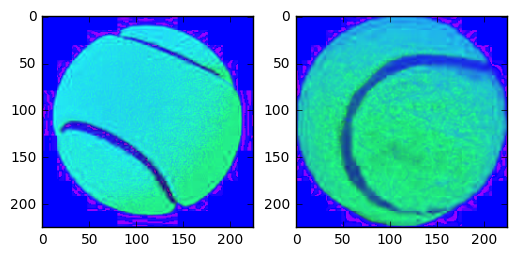

In [4]:
images = ['hist_pics/tennis_1.jpg', 'hist_pics/tennis_2.jpg']
im = []
for image in images:
    i = cv2.imread(image)
    i = cv2.cvtColor(i, cv2.COLOR_BGR2HSV)
    im.append(i)

plt.subplot(1,2,1)
plt.imshow(im[0]);
plt.subplot(1,2,2)
plt.imshow(im[1]);

Let's define a region of interest (ROI) that will be used to find a tennis ball in another image.

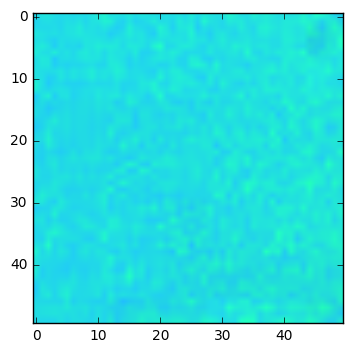

In [5]:
roi = im[0][50:100, 100:150]
plt.imshow(roi);

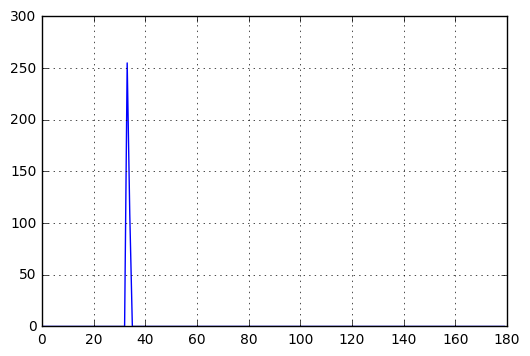

In [10]:
hist = cv2.calcHist([roi],[0],None,[180],[0,180])
# h,s,v = cv2.split(roi)
# hist = cv2.calcHist([h],[0],None,[180],[0,180])
# hist = cv2.calcHist([h],[0],None,[180], [0,180])
cv2.normalize(hist,hist,0,255,cv2.NORM_MINMAX)
hist=np.int32(np.around(hist))
# plt.hist(hist,180,[0,180]);
plt.plot(hist)
plt.grid(True)

In [9]:
# print(hist)

In [11]:
# h,s,v = cv2.split(roi)
# plt.hist(h.ravel(), 180,[0,180]);
# plt.grid(True);

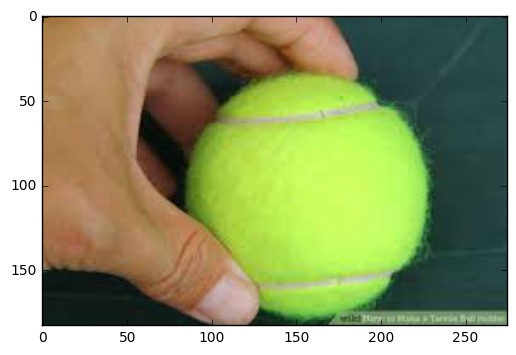

In [13]:
test = cv2.imread('hist_pics/tennis_test.jpg')
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)  # make pretty for ipython
plt.imshow(test);
test = cv2.cvtColor(test, cv2.COLOR_BGR2HSV)  # now convert to HSV

50.0


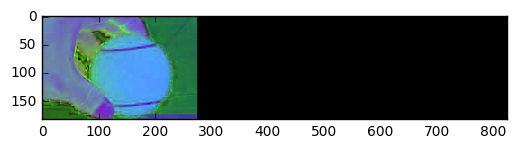

In [14]:
# h,s,v = cv2.split(test)
dst = cv2.calcBackProject([test],[0],hist,[0,180],1)

disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(dst,-1,disc,dst)

ret,thresh = cv2.threshold(dst,50,255,0)
print(ret)
thresh = cv2.merge((thresh,thresh,thresh))
res = cv2.bitwise_and(test,thresh)
res = np.hstack((test,thresh,res))
plt.imshow(res);

(array([ 180.,   19.,    4.,    5.,    4.,    6.,    3.,    2.,    1.,
           3.,    4.,    5.,    7.,    1.,    4.,    4.,    2.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
      

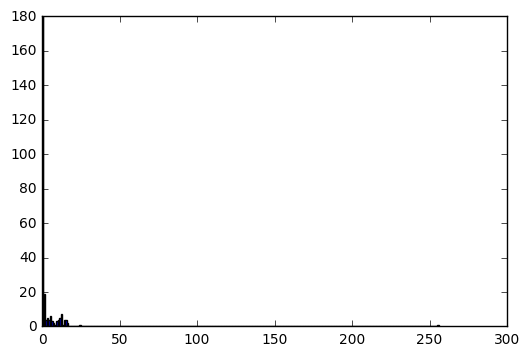

In [21]:
color = [ (255,0,0),(0,255,0),(0,0,255) ]
for ch, col in enumerate(color):
    hist_item = cv2.calcHist(im,[ch],None,[256],[0,256])
    cv2.normalize(hist_item,hist_item,0,255,cv2.NORM_MINMAX)
# print(hist_item)
hist=np.int32(np.around(hist_item))

# h = np.zeros((300,256,3))
# for x,y in enumerate(hist):
#     cv2.line(h,(x,0),(x,y),(255,255,255))
#     y = np.flipud(h)
# plt.imshow('histogram', y)

plt.hist(hist,256,[0,256])
# plt.show()

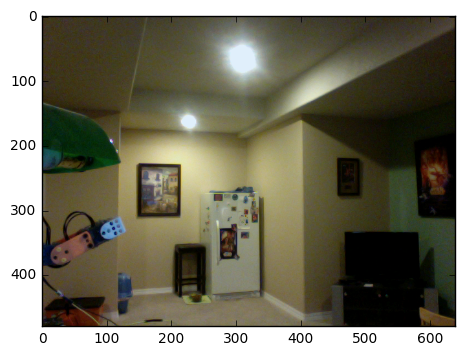

In [14]:
plt.imshow(frame);